In [18]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

%load_ext autoreload
%autoreload 2
    
R = 5
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
def torus_wind(theta, phi, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    ratio = 0.735
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = torus_point(theta+(time_i+i)*math.pi/(4*length), phi+ratio*(time_i+i)*math.pi/(4*length))
        traj[i][0] = (time_i+i)*math.pi/length
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

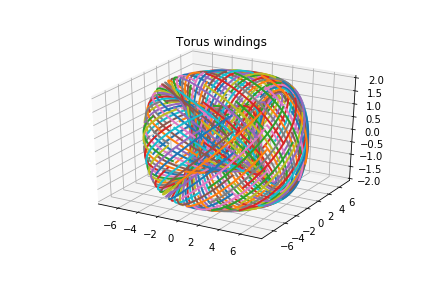

In [20]:
list_traj = []
N=15
length=20

for i in range(N):
    for j in range(N):
        list_traj.append(torus_wind(2*i*math.pi/N, 2*j*math.pi/N, length, noise=0,time_i=0, time_f=2*length))  

ax = plt.figure().add_subplot(projection='3d')
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Torus windings")
for i in range(len(list_traj)):
    ax.plot(*list_traj[i][:,1:].T, lw=2)
plt.show()

In [21]:
traj_list = list_traj
print('Trajectory shape before embedding:')
print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))

def embedding(xyz):
    return np.hstack((xyz, 0.01*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 2*np.ones(xyz.shape)), 
                      0.01*np.power(xyz/np.linalg.norm(xyz, axis=1, keepdims=True), 3*np.ones(xyz.shape))))

                     
A = np.random.randn(1, 9)
#print(A)
A = [[ 0.36956572, -0.56530295, -0.08434743, -1.27003323, -0.34177907, -1.31266121, 0.08831102,  0.36965217,  0.83838318],
 [-1.46928237,  2.41508164, 2.59267909, -.69745742,-1.63944946,-0.05751269, -0.12781221,  0.19239181, 1.40852378],
 [ 0.18748471, -0.53227022,0.66637963, 0.92152638, 0.37343253, -0.14106446, -1.64379584, -0.58575294,  0.27286669]]
A = [[-0.50606406, -0.01208695, -0.77824182,  0.09250119, -0.26805318, -1.80277067,
   0.65785078, -1.50108459,  1.40912873]]

project = True

def embed_and_project(xyz, project=True):
    if project == True:
        return np.matmul(A, embedding(xyz).T).T
    else:
        return embedding(xyz)
    
tlist_new = [0.0 for i in range(len(traj_list))]
for i in range(len(traj_list)):
    tlist_new[i] = np.hstack((np.reshape(traj_list[i][:,0],(traj_list[i][:,0].shape[0],1)), embed_and_project(traj_list[i][:,1:], project)))
traj_list = tlist_new
if project == True:
    print('Trajectory shape after embedding and projecting:')
else:
    print('Trajectory shape after embedding:')

print(traj_list[0].shape)
#print(np.linalg.norm(traj_list[0][:,1:], axis=1))
list_traj = traj_list


Trajectory shape before embedding:
(40, 4)
Trajectory shape after embedding and projecting:
(40, 2)


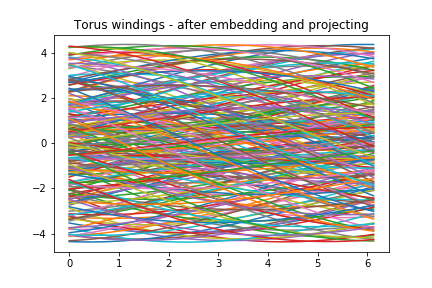

In [22]:
if project == True and traj_list[0].shape[1] > 2:
    ax = plt.figure().add_subplot(projection='3d')
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()
    
elif project == True:
    ax = plt.figure().add_subplot()
    for i in range(0,len(traj_list)):
        ax.plot(*traj_list[i].T)
    ax.set_title("Torus windings - after embedding and projecting")
    plt.show()


In [23]:
t2s = Traj2Sim()

load=False

if project == False:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_hd.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_hd.npy')

if project == True:
    if load == False:
        t2s.set_trajectories(traj_list)
        t2s.compute_mssd(verbose=False)
        t2s.save_bifilt(filename='torus_winding_hdto1d.npy')
    if load == True:
        t2s.load_bifilt(filename='torus_winding_hdto1d.npy')

|███████▏                                | ▆▄▂ 4474/25200 [18%] in 7:46 (9. ▂▄▆ 2/25200 [0%] in 0s (10.5/s,  ▄▆█ 26/25200 [0%] in 2s (11.8/s, ▇▇▅ 35/25200 [0%] in 3s (12.2/s, (12.3/s,in 4s (12.2/s, ▆█▆ 60/25200 [0%] in 5s (12.4/s, 84/25200 [0%] in 7s (12.6/s, in 7s (12.8/s,(12.7/s121/25200 [0%] in 9s (12.8/s178/25200 [1%] in 14s (12.9/182/25200 [1%] in 14s (12.8/ ▆█▆ 202/25200 [1%] in 16s (12.8/ 227/25200 [1%] in 18s (12.7/246/25200 [1%] in 19s (12.7/ 255/25200 [1%] in 20s (12.7/ 258/25200 [1%] in 20s (12.7/ 261/25200 [1%] in 21s (12.7/ ▆█▆ 287/25200 [1%] in 23s (12.7/ 367/25200 [1%] in 29s (12.8/▂▂▄ 387/25200 [2%] in 30s (12.8/420/25200 [2%] in 33s (12.9/▆█▆ 459/25200 [2%] in 36s (12.9/ 461/25200 [2%] in 36s (12.9/ 462/25200 [2%] in 36s (12.9/ 464/25200 [2%] in 36s (12.9/▅▃▁ 468/25200 [2%] in 36s (12.9/ ▄▂▂ 472/25200 [2%] in 37s (12.9/474/25200 [2%] in 37s (12.9/▄▆█ 507/25200 [2%] in 39s (12.9/ in 42s (12.9/ ▄▂▂ 552/25200 [2%] in 43s (12.9/ (12.9/▅▃▁ 581/25200 [2%] in 45s (12.9/ (12.9

|██████████████████▋                     | ▇▅▃ 11717/25200 [46%] in 18:24 (4528/25200 [18%] in 7:52 (9.█▆▄ 4529/25200 [18%] in 7:52 (9. ▄▆█ 4545/25200 [18%] in 7:53 (9.(9.▁▃▅ 4578/25200 [18%] in 7:57 (9. (9. in 8:00 (9.4630/25200 [18%] in 8:02 (9.▂▄▆ 4642/25200 [18%] in 8:03 (9. █▆▄ 4651/25200 [18%] in 8:04 (9. ▆▄▂ 4654/25200 [18%] in 8:04 (9. 4655/25200 [18%] in 8:05 (9.(9. ▃▁▃ 4710/25200 [19%] in 8:10 (9. ▆▄▂ 4723/25200 [19%] in 8:11 (9. in 8:12 (9. 4733/25200 [19%] in 8:13 (9. 4761/25200 [19%] in 8:16 (9.(9.4794/25200 [19%] in 8:19 (9.4805/25200 [19%] in 8:20 (9.in 8:20 (9.4812/25200 [19%] in 8:21 (9.in 8:21 (9. ▂▂▄ 4825/25200 [19%] in 8:22 (9.in 8:24 (9. in 8:25 (9. (9. in 8:30 (9.▆█▆ 4925/25200 [20%] in 8:33 (9.in 8:36 (9.in 8:37 (9. 4973/25200 [20%] in 8:38 (9.in 8:41 (9. ▂▄▆ 5006/25200 [20%] in 8:41 (9.5040/25200 [20%] in 8:45 (9.(9. (9. in 8:56 (9.5244/25200 [21%] in 9:00 (9. in 9:02 (9.in 9:12 (9.▃▁▃ 5426/25200 [22%] in 9:14 (9.in 9:15 (9. (9. 5482/25200 [22%] in 9:18 (9. 5485

|██████████████████████████████▍         | ▆█▆ 19104/25200 [76%] in 30:02 (▂▄▆ 11745/25200 [47%] in 18:27 ( 11753/25200 [47%] in 18:28 (11760/25200 [47%] in 18:28 ((▁▃▅ 11781/25200 [47%] in 18:30 (in 18:34 (▃▁▃ 11816/25200 [47%] in 18:34 ( ▃▅▇ 11841/25200 [47%] in 18:37 (▇▇▅ 11846/25200 [47%] in 18:37 (in 18:38 ( ▄▆█ 11863/25200 [47%] in 18:39 (( (▃▅▇ 11913/25200 [47%] in 18:43 (▃▁▃ 11933/25200 [47%] in 18:45 (11991/25200 [48%] in 18:49 (▁▃▅ 11998/25200 [48%] in 18:49 ( 12027/25200 [48%] in 18:52 ( (in 18:56 ( in 18:59 (12154/25200 [48%] in 19:01 (▅▇▇ 12194/25200 [48%] in 19:04 (▆█▆ 12228/25200 [49%] in 19:06 ( ( in 19:09 (in 19:10 ( ▆█▆ 12290/25200 [49%] in 19:10 (12333/25200 [49%] in 19:13 ( ▂▄▆ 12344/25200 [49%] in 19:14 ( in 19:17 ( ( 12432/25200 [49%] in 19:21 ( 12435/25200 [49%] in 19:21 ( in 19:29 (( 12558/25200 [50%] in 19:30 (▄▆█ 12569/25200 [50%] in 19:30 ( ▁▃▅ 12593/25200 [50%] in 19:32 (12602/25200 [50%] in 19:33 ( in 19:43 ( ▇▅▃ 12794/25200 [51%] in 19:46 (12817/25200 [51%

|█████████████████████████████████████▊  | ▂▂▄ 23764/25200 [94%] in 38:33 ( in 30:02 ( ▁▃▅ 19114/25200 [76%] in 30:03 ( ( in 30:12 (19205/25200 [76%] in 30:12 ( 19206/25200 [76%] in 30:13 ( 19216/25200 [76%] in 30:14 (( in 30:16 (▆▄▂ 19241/25200 [76%] in 30:16 ( 19250/25200 [76%] in 30:17 (( in 30:18 (▃▅▇ 19266/25200 [76%] in 30:19 (in 30:20 (in 30:21 ( in 30:22 ( ▇▇▅ 19305/25200 [77%] in 30:23 (( ( 19327/25200 [77%] in 30:26 (█▆▄ 19342/25200 [77%] in 30:27 ( 19347/25200 [77%] in 30:28 (in 30:28 (19367/25200 [77%] in 30:30 ( ( in 30:32 ( ( (19471/25200 [77%] in 30:41 ( ▃▁▃ 19480/25200 [77%] in 30:42 (▅▇▇ 19502/25200 [77%] in 30:45 ( in 30:46 ( ▆▄▂ 19528/25200 [77%] in 30:48 ( ▃▅▇ 19537/25200 [78%] in 30:49 (19541/25200 [78%] in 30:49 ( in 30:50 (19556/25200 [78%] in 30:51 ( 19563/25200 [78%] in 30:51 ( 19571/25200 [78%] in 30:52 ( in 30:55 ( ▇▇▅ 19603/25200 [78%] in 30:56 ( 19645/25200 [78%] in 31:00 (19658/25200 [78%] in 31:02 ( in 31:02 (in 31:02 ( 19691/25200 [78%] in 31:05 ( 19696/

|████████████████████████████████████████| 25200/25200 [100%] in 41:14.3 (1 ▄▆█ 23769/25200 [94%] in 38:34 ( 23773/25200 [94%] in 38:34 (▂▂▄ 23781/25200 [94%] in 38:35 ( ▆█▆ 23788/25200 [94%] in 38:36 (in 38:37 (23808/25200 [94%] in 38:38 ( ▄▂▂ 23832/25200 [95%] in 38:40 ( ( 23867/25200 [95%] in 38:44 ( ▆▄▂ 23898/25200 [95%] in 38:47 ((▃▅▇ 23909/25200 [95%] in 38:49 ( in 38:52 ( 23942/25200 [95%] in 38:52 (▆█▆ 23945/25200 [95%] in 38:52 ( 23959/25200 [95%] in 38:54 (in 38:54 (( 23975/25200 [95%] in 38:56 (in 38:57 ( 23991/25200 [95%] in 38:57 (▆▄▂ 24000/25200 [95%] in 38:58 ( 24002/25200 [95%] in 38:59 (in 39:00 ( 24035/25200 [95%] in 39:02 ( ▃▅▇ 24064/25200 [95%] in 39:05 ( in 39:06 (in 39:07 ( █▆▄ 24087/25200 [96%] in 39:07 ( in 39:08 ( (▂▄▆ 24114/25200 [96%] in 39:10 (in 39:13 ( in 39:14 ( ▄▆█ 24153/25200 [96%] in 39:14 (▄▆█ 24167/25200 [96%] in 39:16 (24197/25200 [96%] in 39:19 (in 39:21 (▁▃▅ 24231/25200 [96%] in 39:23 ( 24281/25200 [96%] in 39:29 (▃▅▇ 24283/25200 [96%] in 39:29 (i

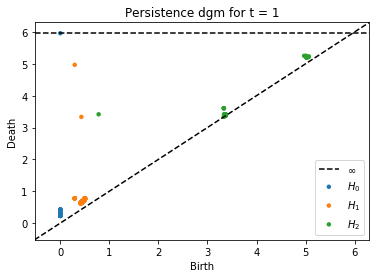

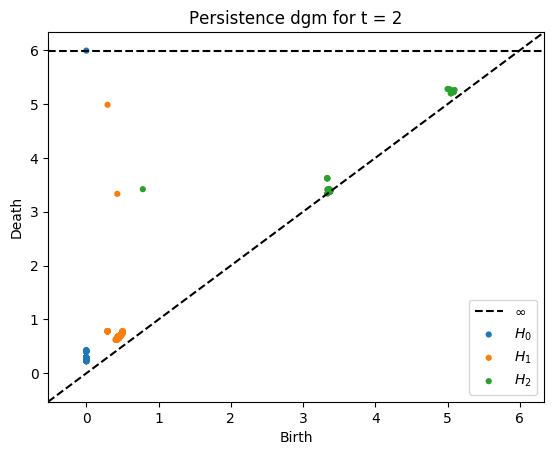

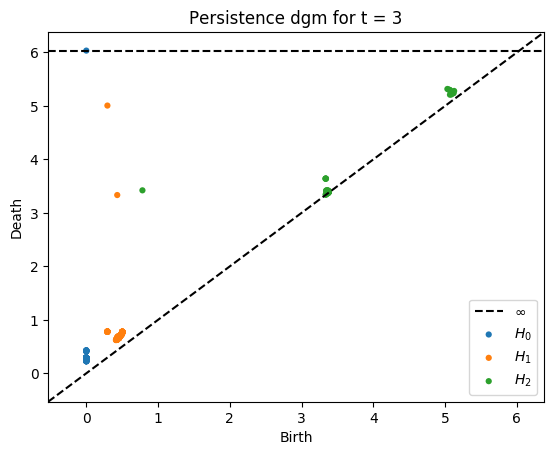

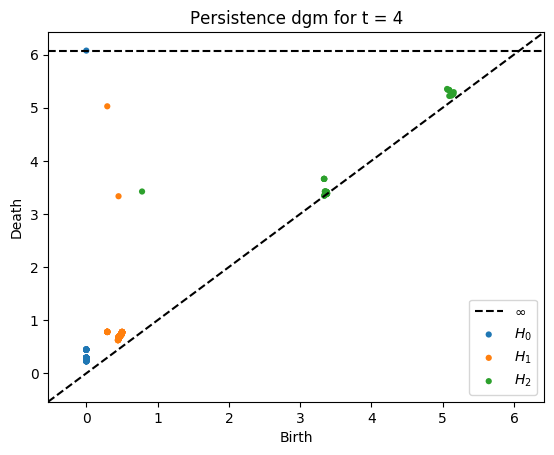

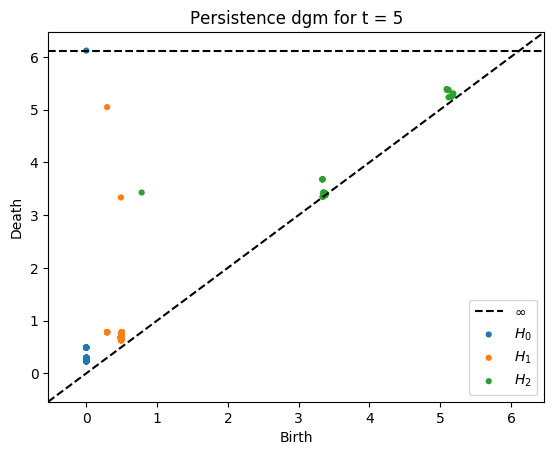

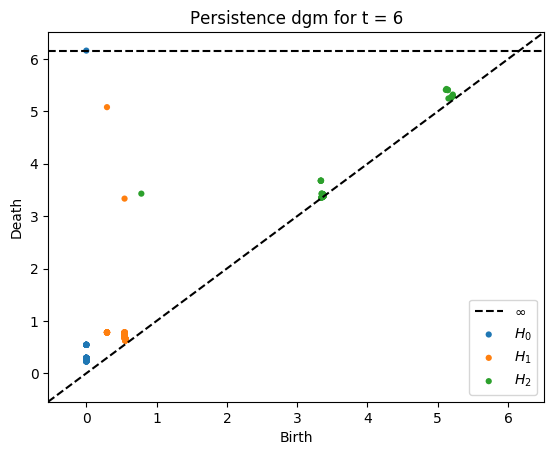

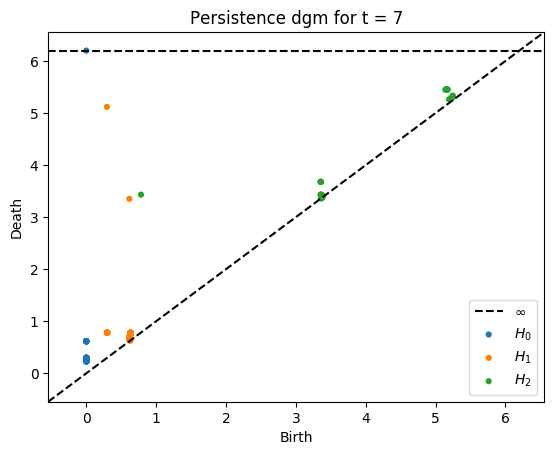

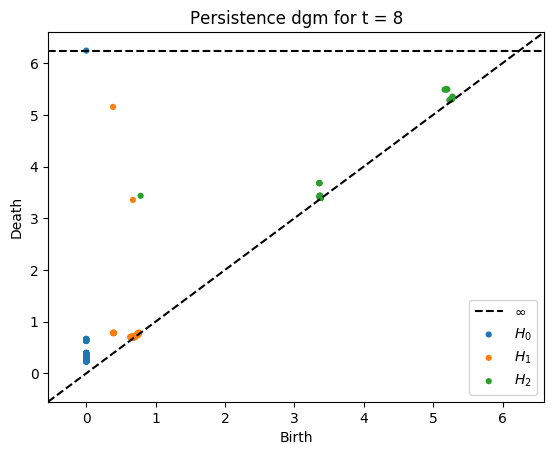

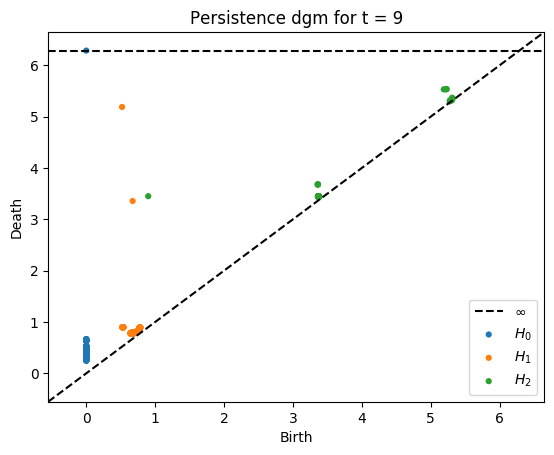

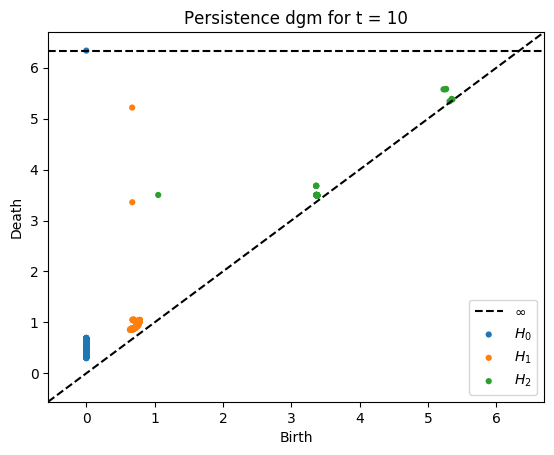

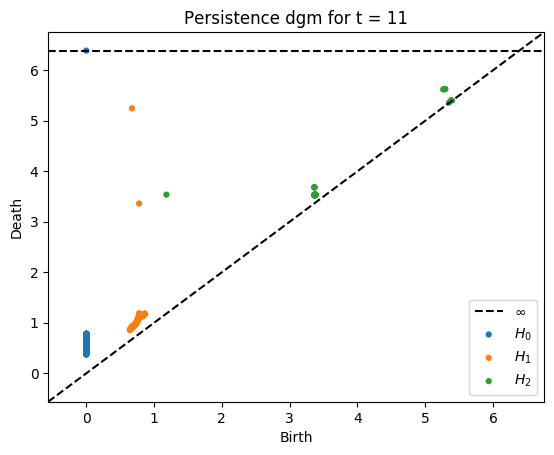

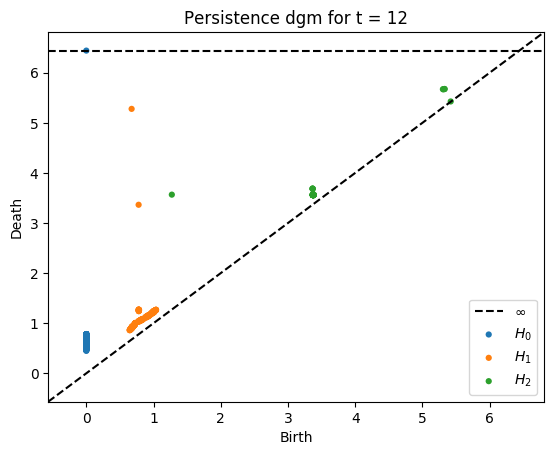

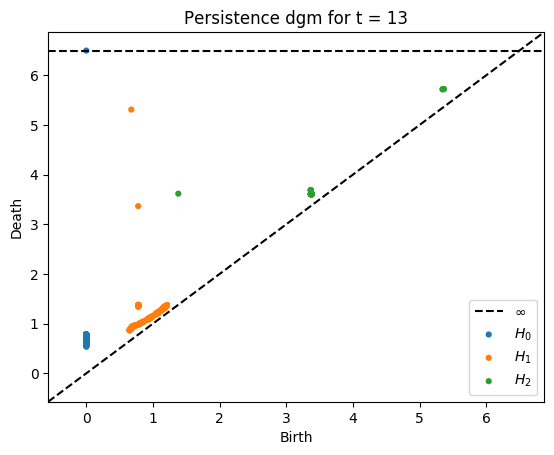

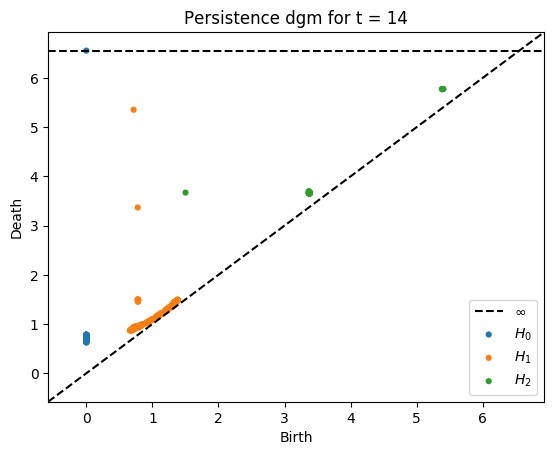

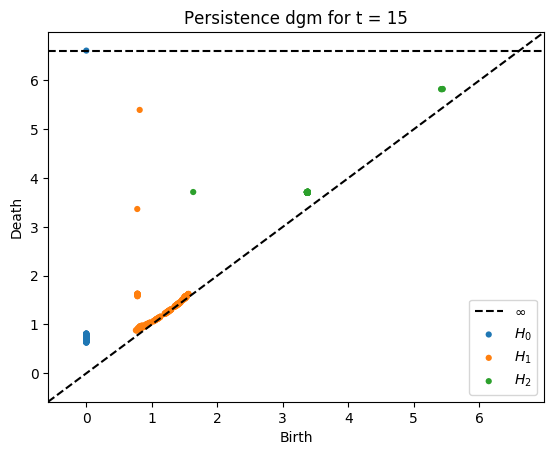

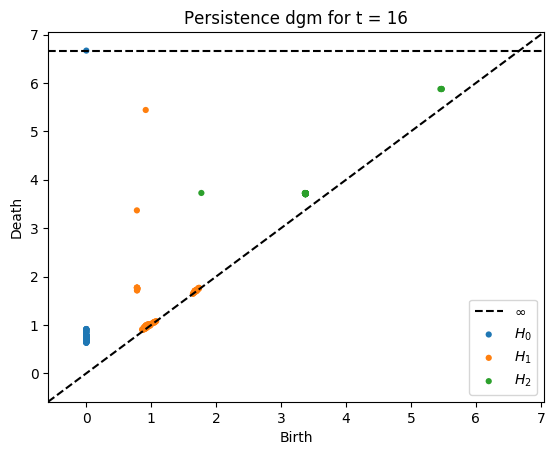

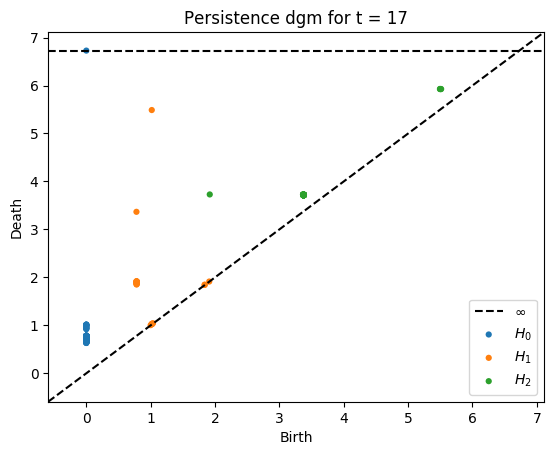

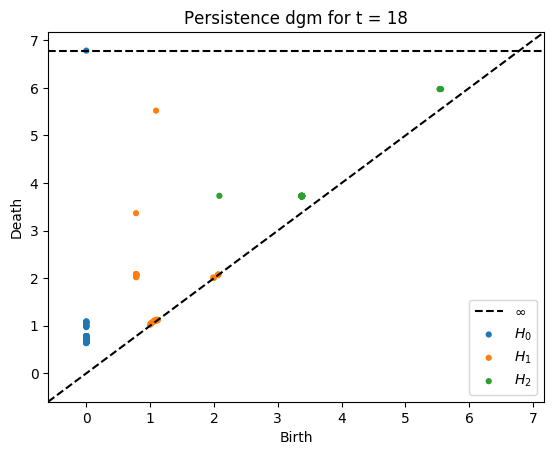

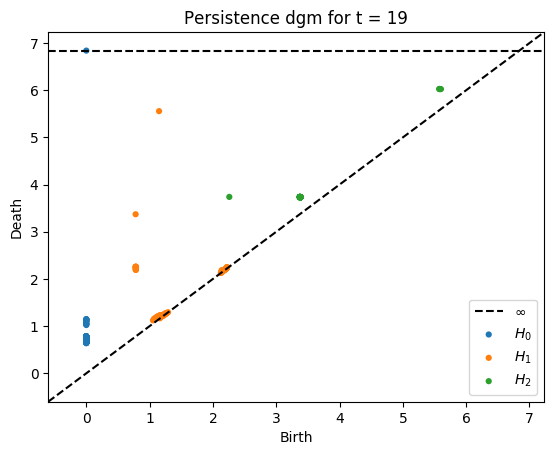

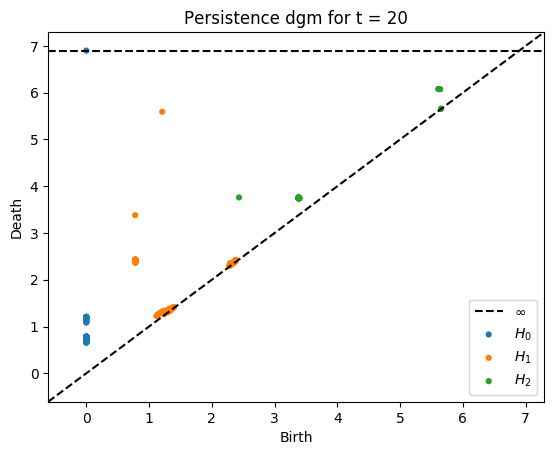

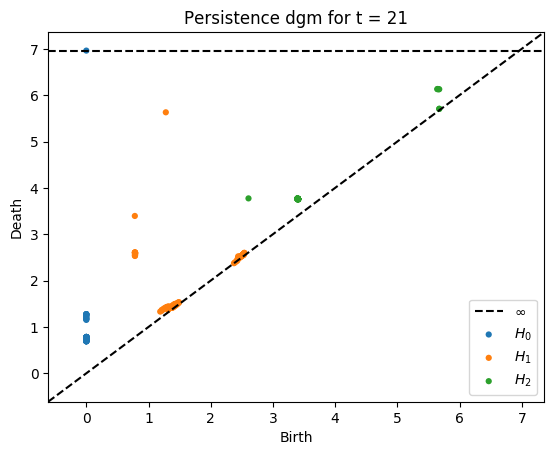

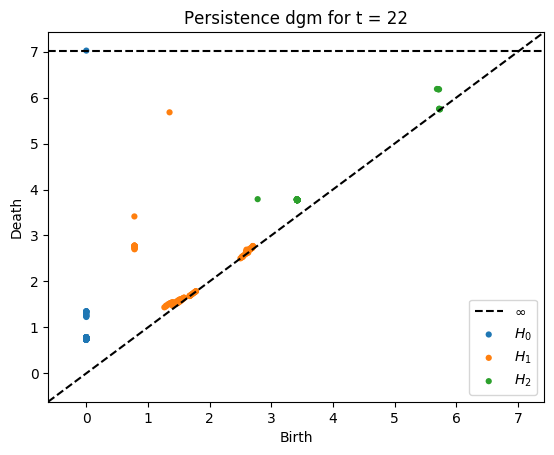

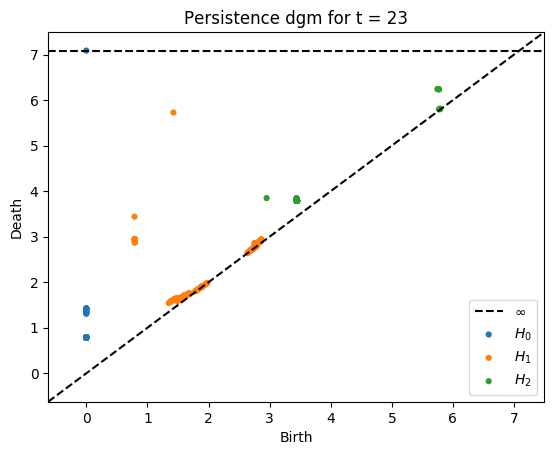

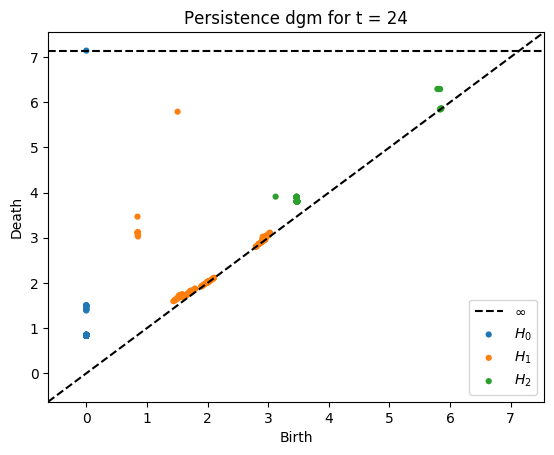

In [6]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == False:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)

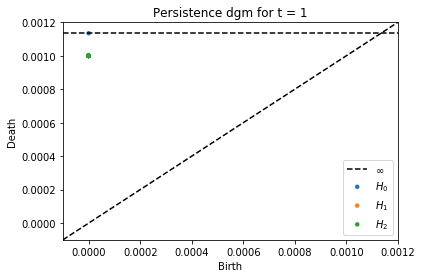

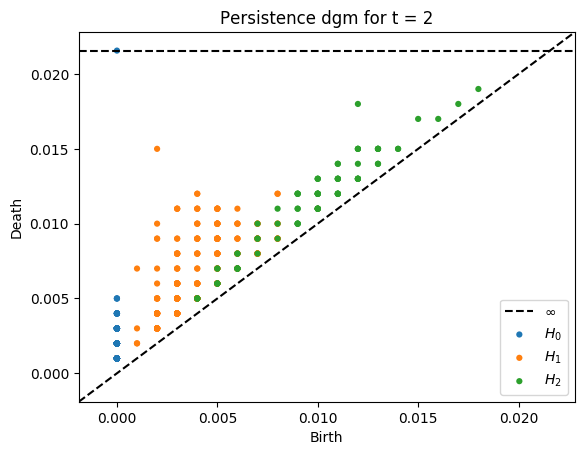

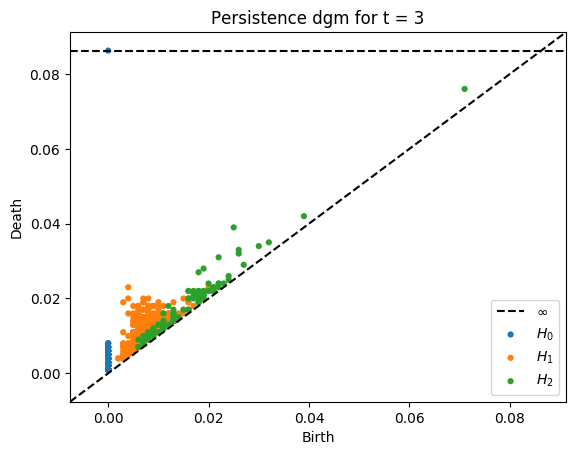

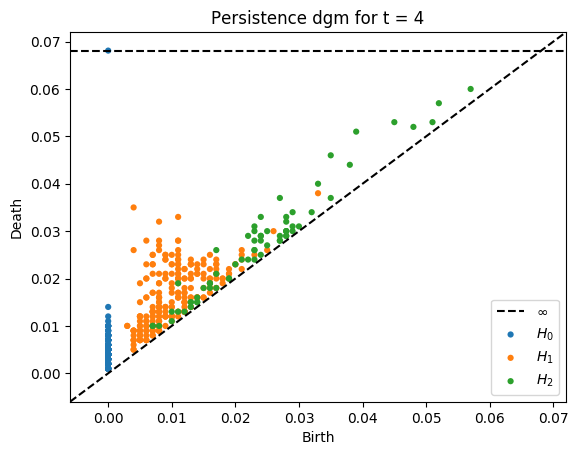

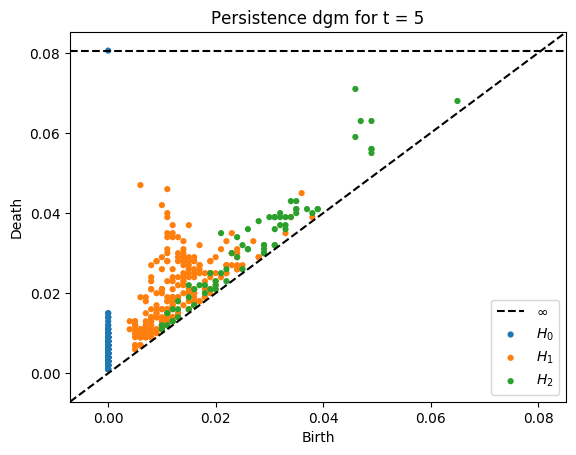

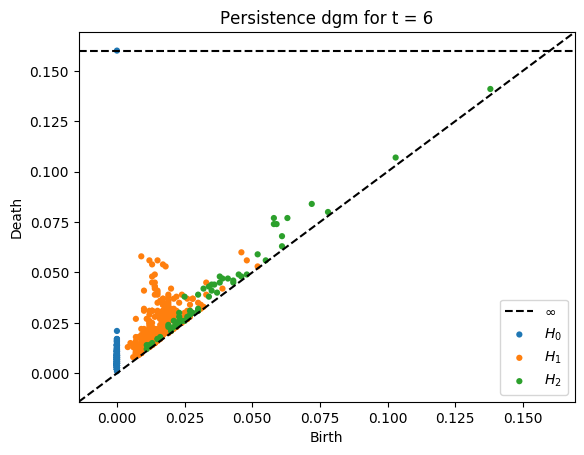

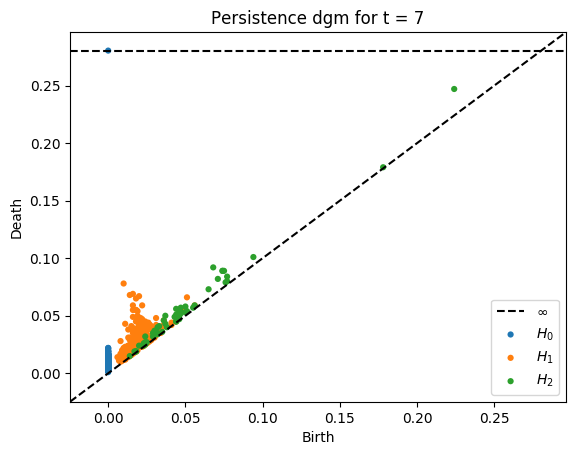

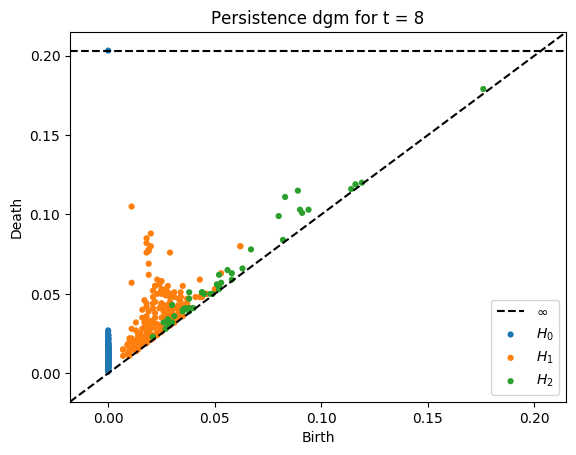

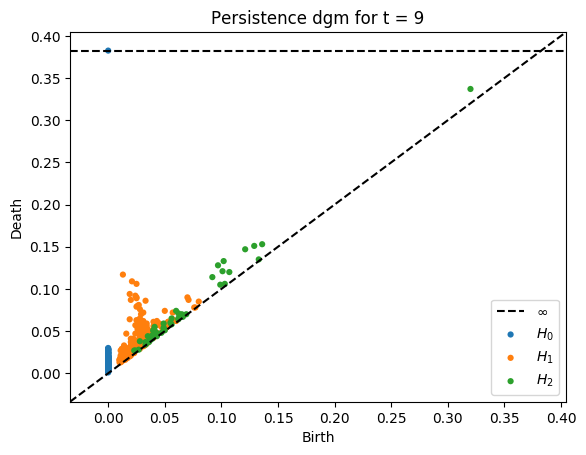

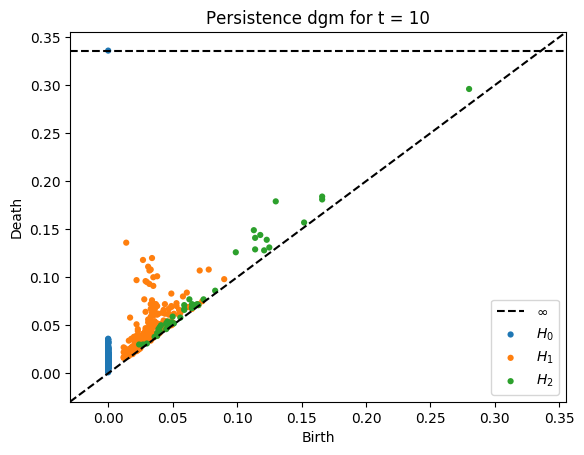

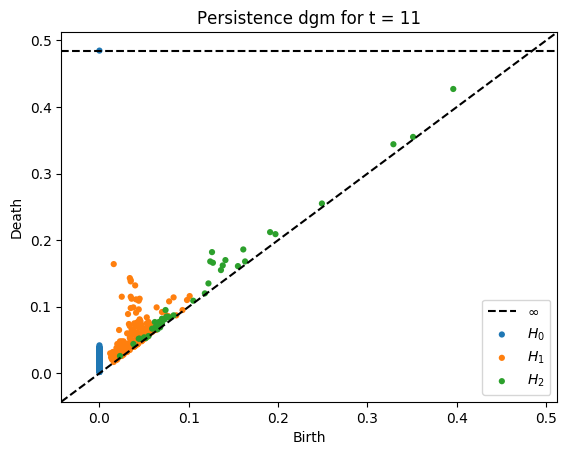

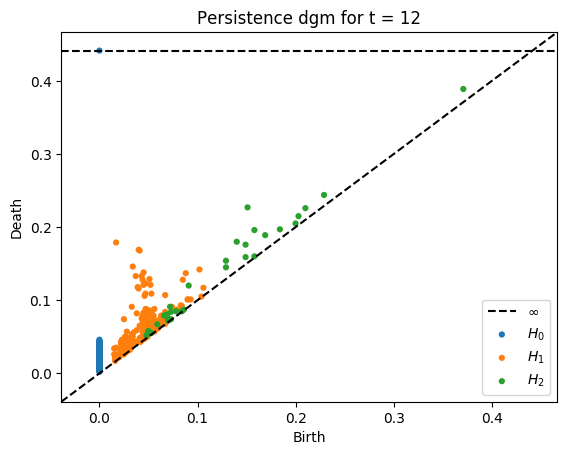

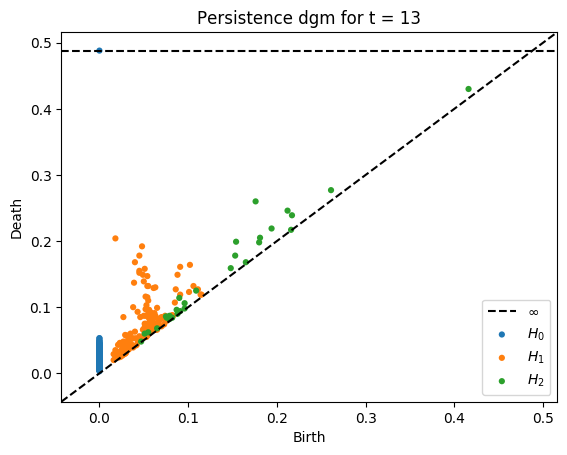

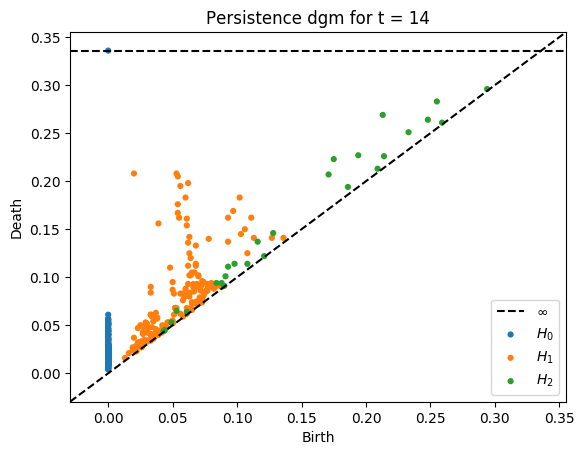

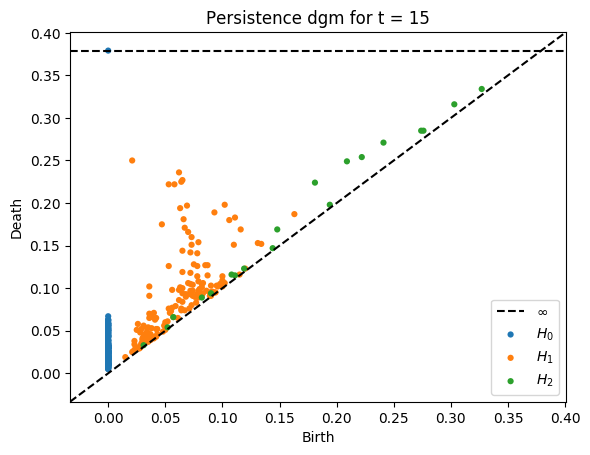

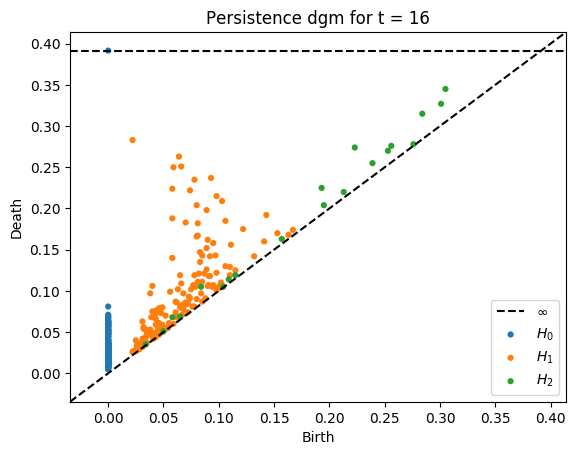

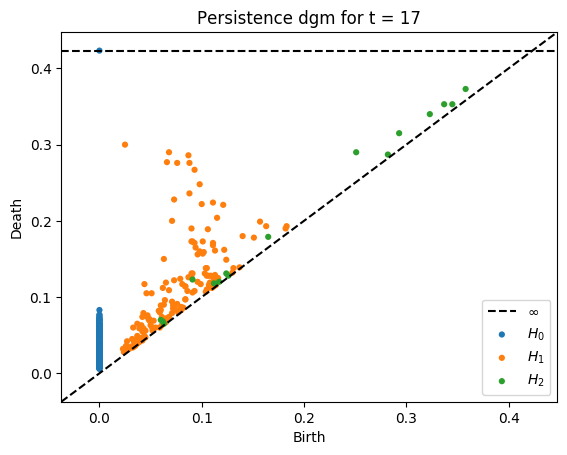

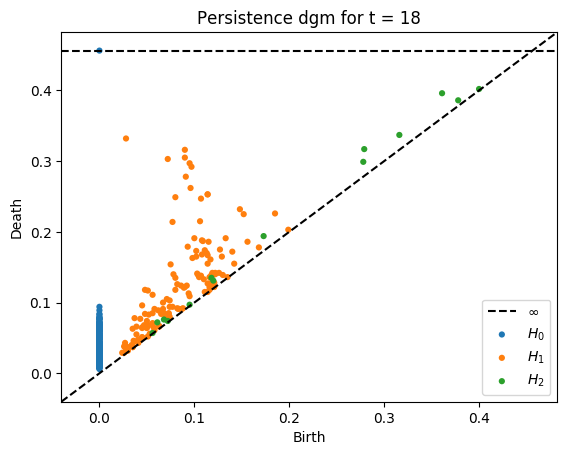

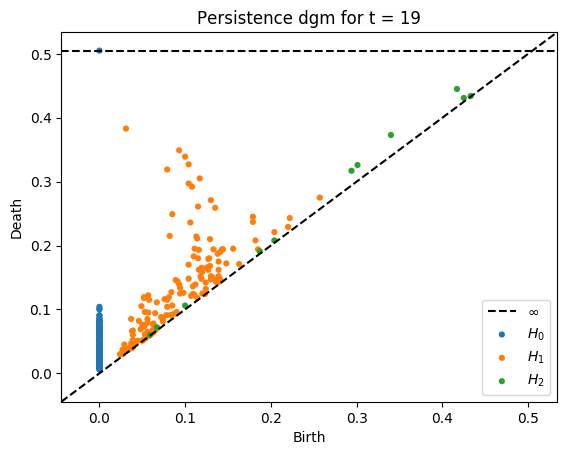

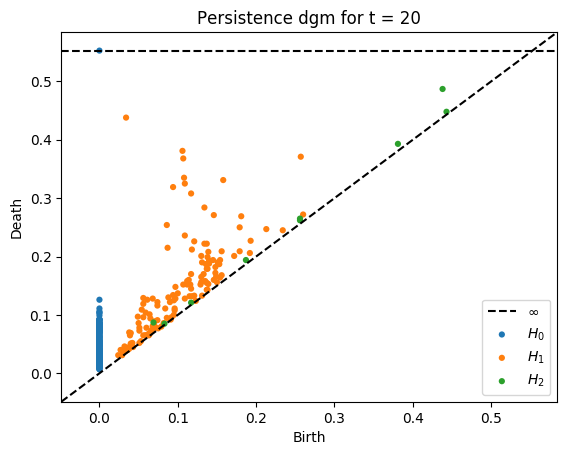

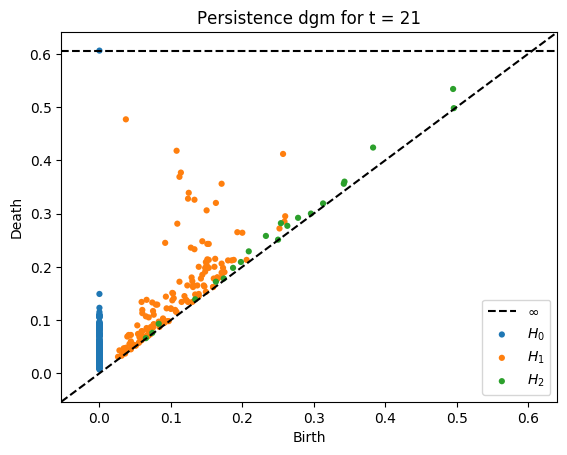

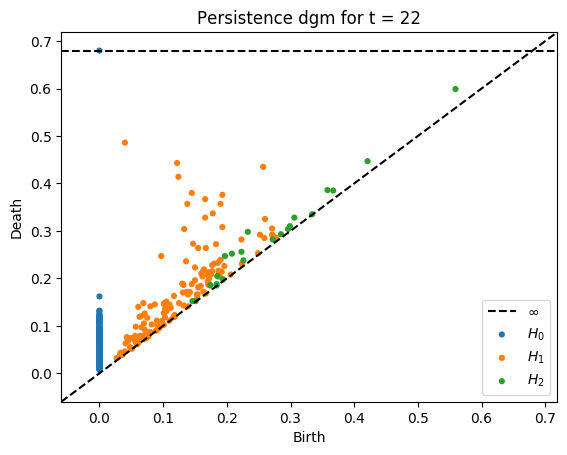

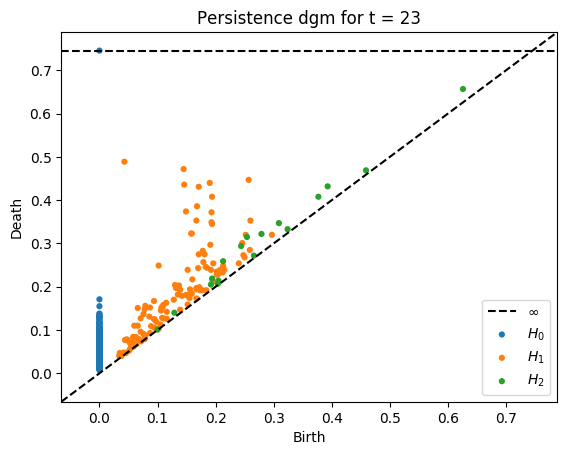

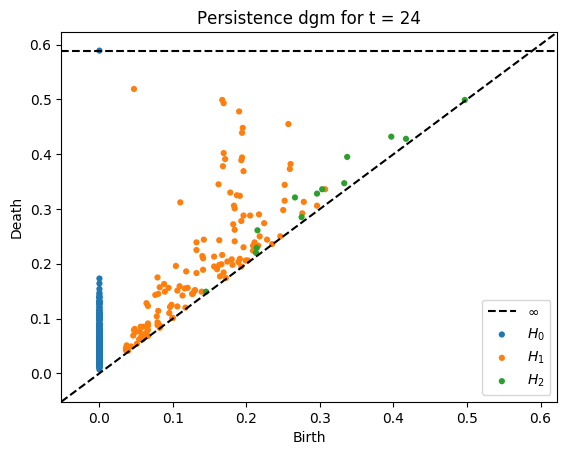

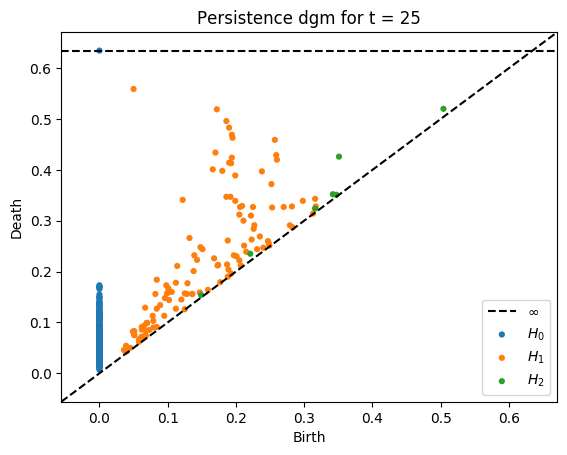

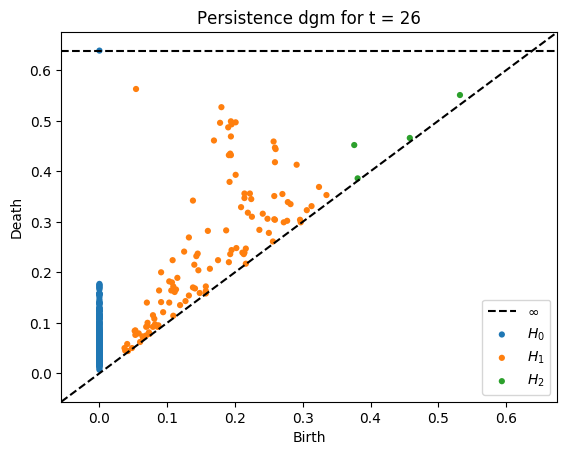

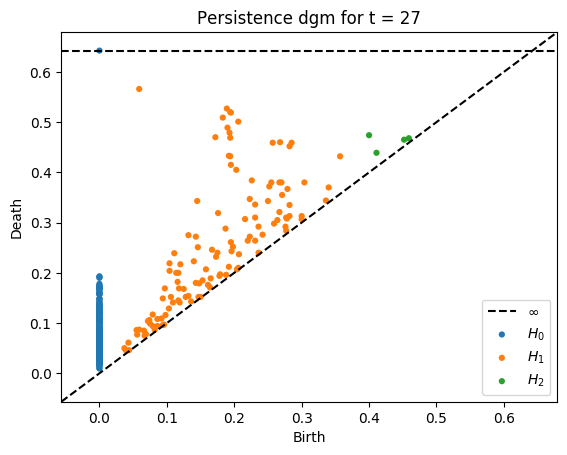

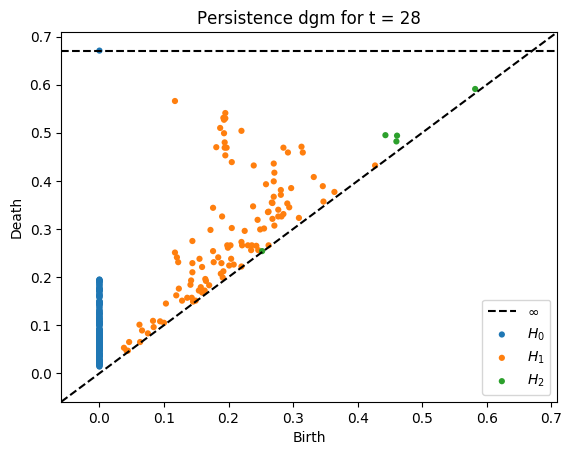

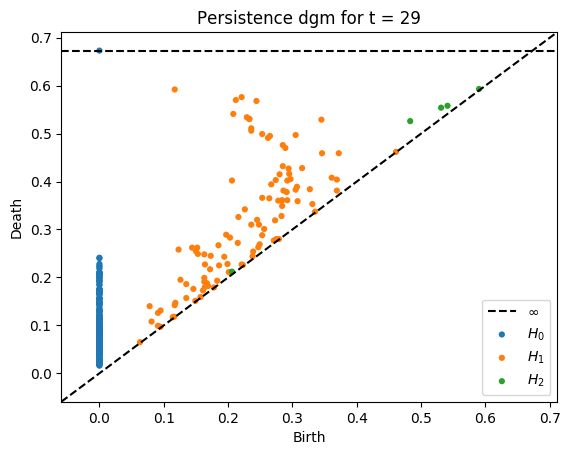

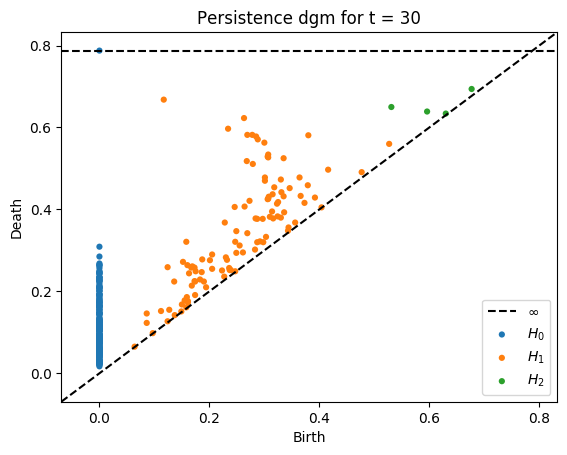

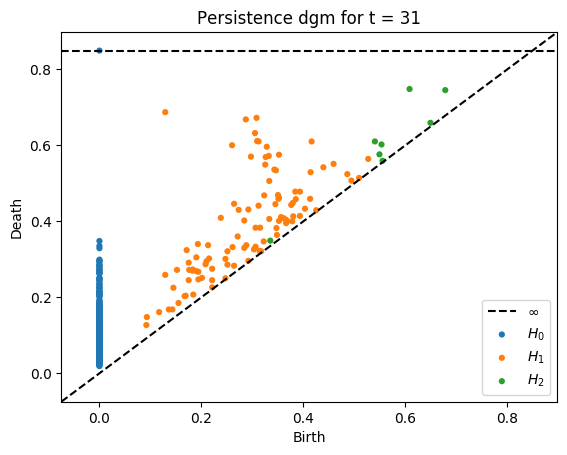

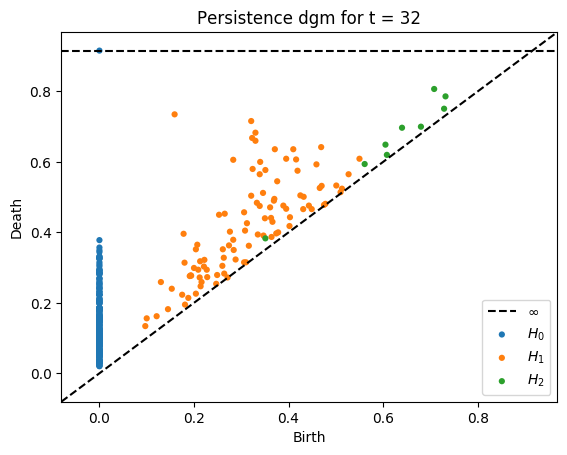

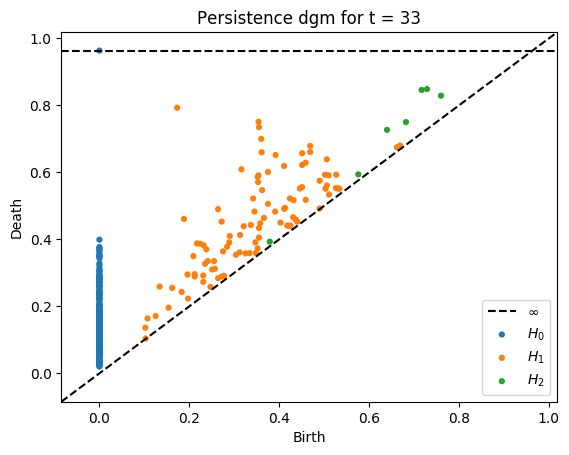

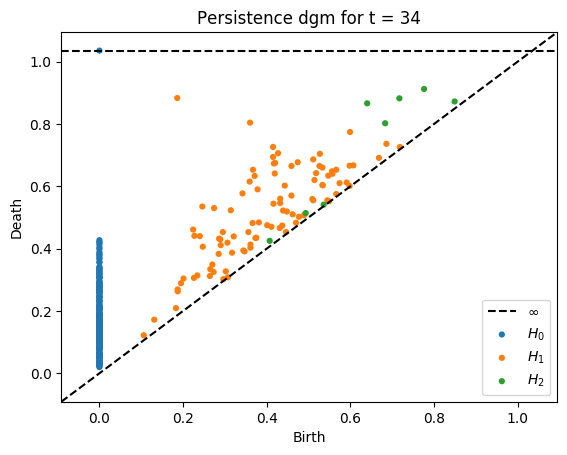

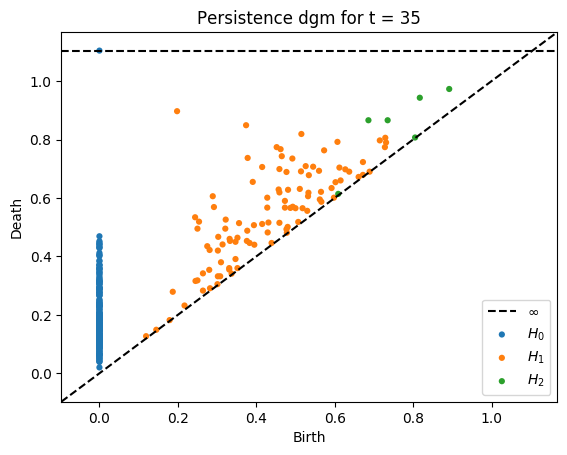

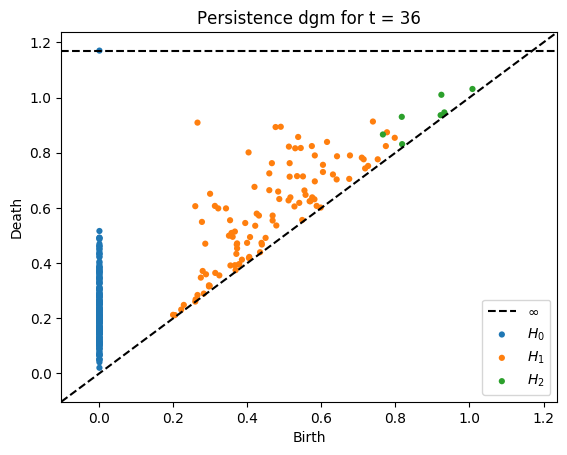

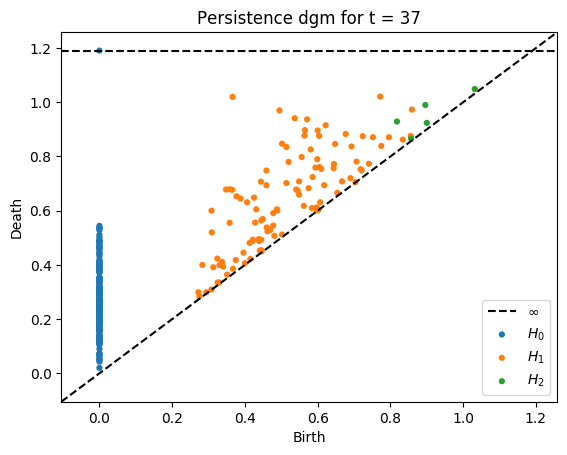

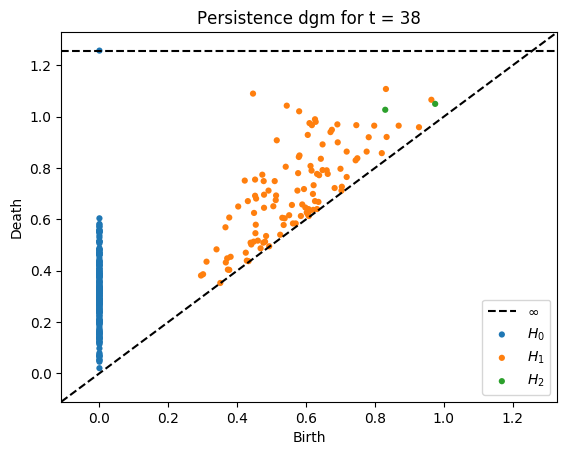

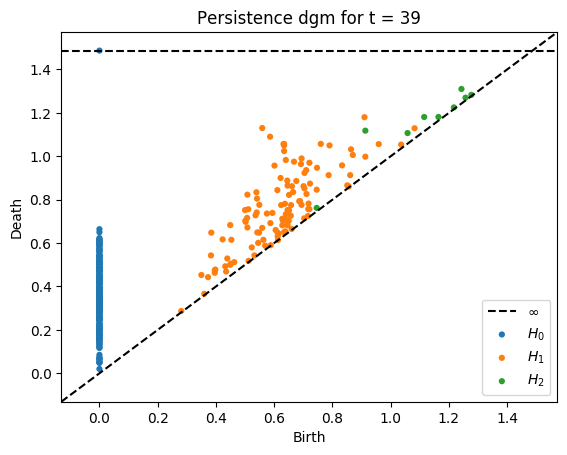

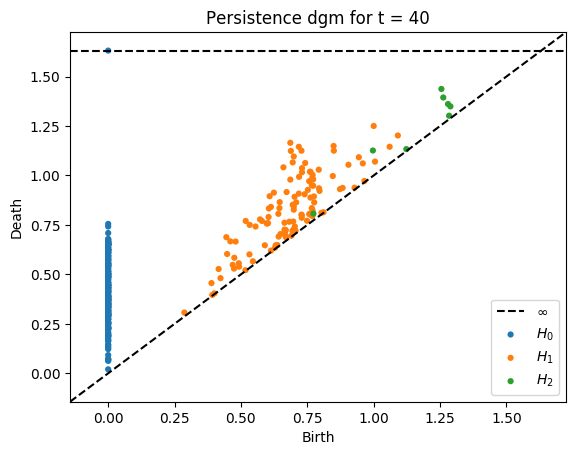

In [24]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

if project == True:
    for i in range(t2s.bifilt.shape[0]):
        dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
        plt.clf()
        plt.title('Persistence dgm for t = '+ str(i+1))
        plot_diagrams(dgms, show = True)